# Clinical Trials Database Analysis
Clinical trials help to introduce new medical techniques, drugs, and medical devices, as well as observe their efficacy. This database can provide insights into medical trends, research by drug and medical device companies, and the activities of hospitals and research centers. There is already a [great study](http://www.alltrials.net/), and [visual](https://trialstracker.ebmdatalab.net/#/) of this database from a group in the UK who wanted to know which research groups were not sharing the results of their studies. This investigation has begun an effort to promote more transparency and accountability of sharing the results of clinical trials, rather than skew results to benefit corporations.

My focus will be on assessing trends of research within the clinical trials database, beginning with an assessment of the types of studies and eventually assessing temporal trends in the types of studies. However, this study is not only motivated out of curiosity. As a biomedical engineer who has participated in entrepreneurial competitions, one of the first questions investors and advisors ask is "have you checked for similar studies and results in the clinicaltrials.gov database?" This is also an attempt to streamline this process for both myself, and other researchers who are assessing the landscape for commercialization, hoepfully saving time along the way.

# Graphs
Please scroll toward the bottom of the document for graphs of preliminary evaluations of a subset of the database.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Checking out a sample csv file from clinicaltrials.gov
The eventual goal will be an  application or analysis that looks at trends in the clinical trials dataset.

In [13]:
df = pd.read_csv('sample-data.csv')

In [14]:
df.head(2)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03418012,Prevention of sPTB With Early Cervical Pessary...,Prometheus,Not yet recruiting,No Results Available,Preterm Birth|Premature Birth,Device: cervical pessary|Other: Control-Group,Children`s survival without neurodevelopmental...,Bürgerhospital Frankfurt,...,March 2023,January 2018,"January 23, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","University of Adelaide, Adelaide, Australia|Ch...",https://ClinicalTrials.gov/show/NCT03418012
1,2,NCT03417999,Pharmacokinetic Study of Intranasal Dexmedetom...,null,Not yet recruiting,No Results Available,Dexmedetomidine|Congenital Heart Disease,Drug: Dexmedetomidine,Serum drug concentration levels of dexmedetomi...,Children's Hospital of Philadelphia,...,"July 1, 2019",January 2018,"January 8, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","Children's Hospital of Philadelphia, Philadelp...",https://ClinicalTrials.gov/show/NCT03417999


In [15]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Recruitment',
       'Study Results', 'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Last Verified',
       'First Submitted', 'First Posted', 'Results First Submitted',
       'Results First Posted', 'Last Update Submitted', 'Last Update Posted',
       'Locations', 'URL'],
      dtype='object')

In [16]:
df['Outcome Measures'].value_counts().sort_values(ascending=False)

Percent compliance                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Sheesh, "Outcome Measure" is sort of a wash. There's a lot of information there, but it's specialty information that cannot be aggregated or tell meaningful things, for now. A text anslysis can be done on just this column to figure things out, but that'll happen later.

In [17]:
df['Conditions'].head()

0                        Preterm Birth|Premature Birth
1             Dexmedetomidine|Congenital Heart Disease
2                                    Alzheimer Disease
3    Spinal; Nerve Root, Pain|Pelvic Pain|Regional ...
4                               Post Partum Depression
Name: Conditions, dtype: object

In [18]:
df.Conditions = df.Conditions.astype(str)

Fuck it, just expand the number of columns so that there are binary counts of which values are present in the row. Make a new df.

In [28]:
import collections
str_df = df['Conditions'].str.split('|')#.apply(Counter)
str_df.dropna()
df4 = str_df.apply(collections.Counter)
df_conditions = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)

df_conditions.sum(axis=0).sort_values(ascending=False)

Sarcopenia                              2
Hemophilia A                            2
Coronary Artery Disease                 2
Breast Cancer                           2
Endoscopic Sinus Surgery                2
Rheumatoid Arthritis                    2
Stroke                                  2
Pancreatic Cancer                       2
Hemophilia B                            2
Vocal Fold Nodules                      2
Dexmedetomidine                         1
Diet Modification                       1
Diabetes Mellitus, Type 2               1
Diabetes Mellitus, Type 1               1
Diabetes Mellitus                       1
Diabetes                                1
Dental Plaque Induced Gingivitis        1
Hemiparesis                             1
Dental Plaque                           1
Dementia                                1
Crohn's Disease                         1
Huntington Disease                      1
Consent Forms                           1
Congenital Heart Disease          

## Conditions
All of the conditions are available in df_conditions. So there are multiple columns that have nested information within them. I'm trying to think about what the best way is to deal with them but the pivot table approach just seems like the best approach so far. However, if I want to make an interactive visualization, that will be a little bit tougher to do.

Solved the bad case of column data type. Now, on to more analysis! 

So, it's interesting to note that some researchers from Oxford have looked at the institutional efficacy of clinical trials, but what about the content of trials? I think it would be interesting to see the trend of trials over the past years and try to make some inferences about why those trends occurred, and why.

## Further exploration
There are columns related to 'conditions' and 'interventions' that might be able to provide more helpful data. There are also a 'study type' and 'study designs' columns that might be helpful in the future, I'll check out the first two first.

In [38]:
df['Interventions'].value_counts().sort_values(ascending=False)

Behavioral: Ambulatory voice biofeedback                                                                                                                                                                                                                                                                 2
Biological: GRN-1201 + Pembrolizumab                                                                                                                                                                                                                                                                     1
Drug: sodium 2-hydroxylinoleic                                                                                                                                                                                                                                                                           1
Drug: Insulin degludec /insulin aspart                                                                 

In [39]:
df['Interventions'] = df['Interventions'].astype(str)
intrv_df = df['Interventions'].str.split('|')#.apply(Counter)
intrv_df.dropna()
df4 = intrv_df.apply(collections.Counter)
df_interventions = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)
df_interventions.head()

,Behavioral: Acoustic music,Behavioral: Ambulatory voice biofeedback,Behavioral: Education and Skill Building Rehabilitation-mobile (ESBR-m),Behavioral: Guided focused attention,"Behavioral: Interactive, shortened consent form",Behavioral: Lifestyle Counseling,Behavioral: Meat-based diet,Behavioral: Original consent form,Behavioral: Peer support,Behavioral: Pesco-vegetarian diet,...,Procedure: Post-treatment volume margin resection,Procedure: Pre-treatment volume margin resection,Procedure: Sham,Procedure: Vitrectomy with retinal vein cannulation and intravenous rtPA (Actilyse) infusion up to 1mg.,Procedure: intramedullary fixation or endoprosthetic reconstruction,Procedure: no suspension,Radiation: Radiotherapy,Radiation: Standard platinum-based chemoradiotherapy,Radiation: prostatic boost in brachytherapy with high dose rate (HDR),nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Study Type and Study Design
Checking it out.

In [40]:
df['Study Designs'].head()

0    Allocation: Randomized|Intervention Model: Par...
1    Allocation: Non-Randomized|Intervention Model:...
2    Allocation: Non-Randomized|Intervention Model:...
3    Observational Model: Cohort|Time Perspective: ...
4    Intervention Model: Single Group Assignment|Ma...
Name: Study Designs, dtype: object

In [41]:
df['Study Type'].head()

0    Interventional
1    Interventional
2    Interventional
3     Observational
4    Interventional
Name: Study Type, dtype: object

In [42]:
df['Study Designs'] = df['Study Designs'].astype(str)
design_df = df['Study Designs'].str.split('|')#.apply(Counter)
design_df.dropna()
df4 = design_df.apply(collections.Counter)
df_designs = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)
df_designs.head()

,Allocation: Non-Randomized,Allocation: Randomized,Intervention Model: Crossover Assignment,Intervention Model: Factorial Assignment,Intervention Model: Parallel Assignment,Intervention Model: Sequential Assignment,Intervention Model: Single Group Assignment,"Masking: Double (Care Provider, Outcomes Assessor)","Masking: Double (Participant, Care Provider)","Masking: Double (Participant, Investigator)",...,Primary Purpose: Diagnostic,Primary Purpose: Health Services Research,Primary Purpose: Other,Primary Purpose: Prevention,Primary Purpose: Supportive Care,Primary Purpose: Treatment,Time Perspective: Cross-Sectional,Time Perspective: Prospective,Time Perspective: Retrospective,nan
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
df['Study Type'] = df['Study Type'].astype(str)
type_df = df['Study Type'].str.split('|')#.apply(Counter)
type_df.dropna()
df4 = type_df.apply(collections.Counter)
df_type = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)
df_type.head()

,Interventional,Observational,null
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [44]:
df_type[(df_type["Interventional"] == 1) & (df_type["Observational"] == 1)]

,Interventional,Observational,null


So there are just interventional and observational studies that can looked at from this dataset. Good to know.

I bet there's a relationship between whether it's an interventional and med-device/pharma vs. some other type of study. Let's check it out.

In [45]:
df[(df["Study Type"] == "Observational")]

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
3,4,NCT03417973,Quality of Life and Pain Changes Due to DRG St...,ACTIVE,Enrolling by invitation,No Results Available,"Spinal; Nerve Root, Pain|Pelvic Pain|Regional ...",Device: dorsal root ganglion neuromodulation,Change in pain|Change in quality of life|Chang...,KM Clinical Research Group,...,"December 31, 2020",January 2018,"August 11, 2017","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","KM Clinical Research Group, Murrieta, Californ...",https://ClinicalTrials.gov/show/NCT03417973
6,7,NCT03417934,Effects of Hip Distraction Without a Perineal ...,null,Enrolling by invitation,No Results Available,Hip Disease,Procedure: Hip Arthroscopy Procedure,Intra-operative application of hip distraction...,"University of Colorado, Denver",...,December 2018,January 2018,"January 19, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","University of Colorado, Hip Preservation Cente...",https://ClinicalTrials.gov/show/NCT03417934
11,12,NCT03417869,QuickVue Influenza A + B Test Field Study,QuickVue Flu,Recruiting,No Results Available,"Influenza A, Influenza B",Device: QuickVue Influenza A+B,Influenza Diagnostic test result,Quidel Corporation,...,February 2018,January 2018,"January 24, 2018","January 31, 2018",null,null,"January 24, 2018","January 31, 2018","American Family Care, Birmingham, Alabama, Uni...",https://ClinicalTrials.gov/show/NCT03417869
12,13,NCT03417856,Defining the Skin and Blood Biomarkers of Icht...,null,Recruiting,No Results Available,Ichthyosis|Netherton Syndrome,nan,Cellular infiltrates|Gene expression|Correlati...,Northwestern University|Icahn School of Medici...,...,"December 31, 2018",January 2018,"January 24, 2018","January 31, 2018",null,null,"January 24, 2018","January 31, 2018",Ann & Robert H. Lurie Children's Hospital of C...,https://ClinicalTrials.gov/show/NCT03417856
16,17,NCT03417804,Incidence of Postoperative Residual Neuromuscu...,null,Not yet recruiting,No Results Available,Residual Neuromuscular Blockade|Residual Paral...,nan,Incidence of postoperative residual neuromuscu...,Centro Hospitalar do Porto,...,"July 31, 2019",January 2018,"January 25, 2018","January 31, 2018",null,null,"January 25, 2018","January 31, 2018",NaN,https://ClinicalTrials.gov/show/NCT03417804
17,18,NCT03417791,Recovery of Serum Creatinine at Discharge Impa...,RECOST,"Active, not recruiting",No Results Available,Kidney; Functional Disturbance,Other: no intervention,all-cause mortality,Guangdong General Hospital,...,"December 30, 2018",November 2017,"January 17, 2018","January 31, 2018",null,null,"January 24, 2018","January 31, 2018","Guangdong General Hospital, Guangzhou, Guangdo...",https://ClinicalTrials.gov/show/NCT03417791
22,23,NCT03417726,Evaluation of Pediatric Balance Scale and Quan...,null,Recruiting,No Results Available,"Cerebral Palsy, Spastic|Balance; Distorted",nan,Modified Clinical Test of Sensory Interaction ...,Marmara University,...,"January 1, 2019",January 2018,"January 11, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018",Marmara University School of Medicine Departme...,https://ClinicalTrials.gov/show/NCT03417726
23,24,NCT03417713,Clinical Evaluation of the OEC Elite MD for Va...,null,Not yet recruiting,No Results Available,Interventional Vascular Conditions,Device: Fluoroscopic imaging with the OEC Elit...,Image Guidance Adequacy collected via Survey Q...,GE Healthcare,...,June 2018,January 2018,"January 12, 2018","January 31, 2018",null,null,"January 24, 2018","January 31, 2018",NaN,https://ClinicalTrials.gov/show/NCT03417713
31,32,NCT03417609,Interest of a Tongue Strength Measurement in t...,null,Not yet recruiting,No Results Available,Sarcopenia,Device: Tongue strength

In [46]:
df[(df["Study Type"] == "Interventional")]

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03418012,Prevention of sPTB With Early Cervical Pessary...,Prometheus,Not yet recruiting,No Results Available,Preterm Birth|Premature Birth,Device: cervical pessary|Other: Control-Group,Children`s survival without neurodevelopmental...,Bürgerhospital Frankfurt,...,March 2023,January 2018,"January 23, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","University of Adelaide, Adelaide, Australia|Ch...",https://ClinicalTrials.gov/show/NCT03418012
1,2,NCT03417999,Pharmacokinetic Study of Intranasal Dexmedetom...,null,Not yet recruiting,No Results Available,Dexmedetomidine|Congenital Heart Disease,Drug: Dexmedetomidine,Serum drug concentration levels of dexmedetomi...,Children's Hospital of Philadelphia,...,"July 1, 2019",January 2018,"January 8, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","Children's Hospital of Philadelphia, Philadelp...",https://ClinicalTrials.gov/show/NCT03417999
2,3,NCT03417986,Clinical Trial to Explore the the Amyloid Beta...,drainAD,Recruiting,No Results Available,Alzheimer Disease,Drug: TEP,Efflux of Amyloid beta peptides (Group mean ch...,Immungenetics AG,...,July 2021,January 2018,"November 29, 2017","January 31, 2018",null,null,"January 30, 2018","January 31, 2018",Klinik für Psychiatrie und Psychotherapie Univ...,https://ClinicalTrials.gov/show/NCT03417986
4,5,NCT03417960,Accelerated iTBS for Post Partum Depression,null,Recruiting,No Results Available,Post Partum Depression,Device: iTBS,Determine feasibility and tolerability of acce...,Medical University of South Carolina,...,"July 1, 2019",January 2018,"January 24, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","Medical University of South Carolina, Charlest...",https://ClinicalTrials.gov/show/NCT03417960
5,6,NCT03417947,Vitamin D Supplementation in Children With Sic...,null,Not yet recruiting,No Results Available,Sickle Cell Disease,Dietary Supplement: Vitamin D bolus|Dietary Su...,Mean change in total serum 25-hydroxyvitamin D...,St. Justine's Hospital|Euro-Pharm,...,"July 31, 2019",January 2018,"January 11, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018",NaN,https://ClinicalTrials.gov/show/NCT03417947
7,8,NCT03417921,A Study of ABTL0812 in Pancreatic Cancer,Pancreatic,Not yet recruiting,No Results Available,Pancreatic Cancer,Drug: sodium 2-hydroxylinoleic,Emergent Adverse Events,Ability Pharmaceuticals SL|The Cleveland Clinic,...,"September 2, 2020",January 2018,"January 22, 2018","January 31, 2018",null,null,"January 29, 2018","January 31, 2018",NaN,https://ClinicalTrials.gov/show/NCT03417921
8,9,NCT03417908,Respiratory Muscle Stretching Effect on Functi...,null,"Active, not recruiting",No Results Available,COPD,Procedure: PNF|Procedure: Sham,Change in inspiratory capacity|Change in maxim...,Universidade Federal do Pampa|Federal Universi...,...,"February 28, 2018",January 2018,"January 24, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","Anelise Dumke, Uruguaiana, Rio Grande Do Sul, ...",https://ClinicalTrials.gov/show/NCT03417908
9,10,NCT03417895,SHR-1210 Combined With Apatinib in Treatment o...,PASSION,Not yet recruiting,No Results Available,Small-cell Lung Cancer,Drug: SHR-1210|Drug: Apatinib,Adverse event of part 1|ORR|Adverse event|OS r...,"Jiangsu HengRui Medicine Co., Ltd.",...,March 2020,January 2018,"January 8, 2018","January 31, 2018",null,null,"January 29, 2018","January 31, 2018",Cancer Hospital Chinese Academy of Medical Sci...,https://ClinicalTrials.gov/show/NCT03417895
10,11,NCT03417882,GRN-1201 With Pembrolizumab in Subjects With M...,null,Not yet recruiting,No Results Available,Metastatic NSCLC,Biological: GRN-1201 + Pem

In [47]:
df_interventions = df[(df["Study Type"] == "Interventional")]

To distinguish, probably just bettter to regex by word in the "Interventions" column. Want to get all of the words just before the colon. Fuck, also have to split by a vertical line. 

So split by the vertical line, then regex the word before the colon in order to create a pivot table that allows for the aggregation of information. Each study will then have a count of the types of interventions that they are using.

## Quick note on the difference between interventional and observational
Observational study designs, also called epidemiologic study designs, are often retrospective and are used to assess potential causation in exposure-outcome relationships and therefore influence preventive methods. Observational study designs include ecological designs, cross sectional, case-control, case-crossover, retrospective and prospective cohorts. An important subset of observational studies is diagnostic study designs, which evaluate the accuracy of diagnostic procedures and tests as compared to other diagnostic measures. These include diagnostic accuracy designs, diagnostic cohort designs, and diagnostic randomized controlled trials.

Interventional studies are often prospective and are specifically tailored to evaluate direct impacts of treatment or preventive measures on disease. Each study design has specific outcome measures that rely on the type and quality of data utilized. Additionally, each study design has potential limitations that are more severe and need to be addressed in the design phase of the study. This manuscript is meant to provide an overview of study design types, strengths and weaknesses of common observational and interventional study designs.

I'll focus on interventions, for now.

In [48]:
df_interventions.head(2)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03418012,Prevention of sPTB With Early Cervical Pessary...,Prometheus,Not yet recruiting,No Results Available,Preterm Birth|Premature Birth,Device: cervical pessary|Other: Control-Group,Children`s survival without neurodevelopmental...,Bürgerhospital Frankfurt,...,March 2023,January 2018,"January 23, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","University of Adelaide, Adelaide, Australia|Ch...",https://ClinicalTrials.gov/show/NCT03418012
1,2,NCT03417999,Pharmacokinetic Study of Intranasal Dexmedetom...,null,Not yet recruiting,No Results Available,Dexmedetomidine|Congenital Heart Disease,Drug: Dexmedetomidine,Serum drug concentration levels of dexmedetomi...,Children's Hospital of Philadelphia,...,"July 1, 2019",January 2018,"January 8, 2018","January 31, 2018",null,null,"January 30, 2018","January 31, 2018","Children's Hospital of Philadelphia, Philadelp...",https://ClinicalTrials.gov/show/NCT03417999


In [49]:
df_interventions['Interventions'] = df_interventions['Interventions'].astype(str)
df_intrv_split = df_interventions['Interventions'].str.split('|')
df_intrv_split.dropna()
df4 = df_intrv_split.apply(collections.Counter)
df_intrv_study = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)
df_intrv_study.head()

/Users/vincent_zaballa/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Behavioral: Acoustic music,Behavioral: Ambulatory voice biofeedback,Behavioral: Education and Skill Building Rehabilitation-mobile (ESBR-m),Behavioral: Guided focused attention,"Behavioral: Interactive, shortened consent form",Behavioral: Lifestyle Counseling,Behavioral: Meat-based diet,Behavioral: Original consent form,Behavioral: Peer support,Behavioral: Pesco-vegetarian diet,...,Procedure: Esophagogastroduodenoscopy with high definition-white light end endoscopy (HD-WLE) and narrow band imaging (NBI),Procedure: Falciform ligament suspension,Procedure: PNF,Procedure: Post-treatment volume margin resection,Procedure: Pre-treatment volume margin resection,Procedure: Sham,Procedure: Vitrectomy with retinal vein cannulation and intravenous rtPA (Actilyse) infusion up to 1mg.,Procedure: no suspension,Radiation: Radiotherapy,Radiation: prostatic boost in brachytherapy with high dose rate (HDR)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_intrv_study.columns

Index(['Behavioral: Acoustic music',
       'Behavioral: Ambulatory voice biofeedback',
       'Behavioral: Education and Skill Building Rehabilitation-mobile (ESBR-m)',
       'Behavioral: Guided focused attention',
       'Behavioral: Interactive, shortened consent form',
       'Behavioral: Lifestyle Counseling', 'Behavioral: Meat-based diet',
       'Behavioral: Original consent form', 'Behavioral: Peer support',
       'Behavioral: Pesco-vegetarian diet',
       ...
       'Procedure: Esophagogastroduodenoscopy with high definition-white light end endoscopy (HD-WLE) and narrow band imaging (NBI)',
       'Procedure: Falciform ligament suspension', 'Procedure: PNF',
       'Procedure: Post-treatment volume margin resection',
       'Procedure: Pre-treatment volume margin resection', 'Procedure: Sham',
       'Procedure: Vitrectomy with retinal vein cannulation and intravenous rtPA (Actilyse) infusion up to 1mg.',
       'Procedure: no suspension', 'Radiation: Radiotherapy',
       

Splitting up by the word behind the colon. Just use the columns list and find all unique ones. Then aggregate by those (based on the SO post). 

In [51]:
interventional_cols_list = df_intrv_study.columns
import re
find = re.compile(r"^[^:]*")
intervention_types = []
for col in interventional_cols_list:
    intervention_types.append(re.search(find, col).group(0))
print(set(intervention_types))

{'Combination Product', 'Device', 'Behavioral', 'Biological', 'Other', 'Radiation', 'Drug', 'Procedure', 'Dietary Supplement'}


*Cool, now we have the words that are associated with interventional studies.*

Can look at:
- Trends over time
- Similarities to other studies
- Bag of words for the various study titles

## Prototyping with 10k examples
Can do everything I want to do with just 10k examples, and then work on getting all of the xml files loaded later. I'm looking for trends of the type of studies over time, whether it's a device or drug that's being tested, and how successful were each of those trials?

In [51]:
df = pd.read_csv('SearchResults10k.csv')
df.head(2)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03419377,Lichen Sclerosus - the Influence on Quality of...,null,Recruiting,No Results Available,Lichen Sclerosus,Other: Standard care and sexological counseling,Quality of Life,Vendsyssel Hospital,...,"December 31, 2019",January 2018,"January 26, 2018","February 1, 2018",null,null,"January 26, 2018","February 1, 2018","Vendsyssel Hospital, Hjørring, Denmark",https://ClinicalTrials.gov/show/NCT03419377
1,2,NCT03419364,Study of Nicotinamide in Early Onset Preeclampsia,null,Recruiting,No Results Available,Preeclampsia,Drug: nicotinamide,Change in Mean Arterial blood Pressure (MAP)|N...,"University of North Carolina, Chapel Hill|Euni...",...,"December 31, 2019",January 2018,"January 26, 2018","February 1, 2018",null,null,"January 31, 2018","February 1, 2018","UNC at Chapel Hill, Chapel Hill, North Carolin...",https://ClinicalTrials.gov/show/NCT03419364


In [36]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Recruitment',
       'Study Results', 'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Last Verified',
       'First Submitted', 'First Posted', 'Results First Submitted',
       'Results First Posted', 'Last Update Submitted', 'Last Update Posted',
       'Locations', 'URL'],
      dtype='object')

In [37]:
import re
import collections
df['Interventions'] = df['Interventions'].astype(str)
df_intrv_split = df['Interventions'].str.split('|')
df_intrv_split.dropna()
df4 = df_intrv_split.apply(collections.Counter)
df_intrv_study = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)

interventional_cols_list = df_intrv_study.columns

find = re.compile(r"^[^:]*")
intervention_types = []
for col in interventional_cols_list:
    intervention_types.append(re.search(find, col).group(0))
print(set(intervention_types))

{'Drug', 'Other', 'Dietary Supplement', 'Behavioral', 'nan', 'Genetic', 'Combination Product', 'Device', 'Radiation', 'Diagnostic Test', 'Biological', 'Procedure'}


In [38]:
def vert_pivot_maker(df_series):
    """Should only take string-type columns. Prints aggregate values and returns a df."""
    df_series = df_series.astype(str)
    df_split = df_series.str.split('|')
    df_split.dropna()
    df_counter = df_split.apply(collections.Counter)
    df_pivot = pd.DataFrame.from_records(df_counter).fillna(value=0).astype(int)
    print(df_pivot.sum(axis=0).sort_values(ascending=False))
    return df_pivot

In [85]:
info = vert_pivot_maker(df['Sponsor/Collaborators'])

National Cancer Institute (NCI)                          150
Assiut University                                        123
Cairo University                                         105
Bristol-Myers Squibb                                      80
Mayo Clinic                                               76
Merck Sharp & Dohme Corp.                                 75
Peking University People's Hospital                       70
Duke University                                           69
AstraZeneca                                               62
Seoul National University Hospital                        57
National Institutes of Health Clinical Center (CC)        55
Massachusetts General Hospital                            54
Pfizer                                                    53
GlaxoSmithKline                                           50
University Health Network, Toronto                        49
University of California, San Francisco                   49
University of Colorado, 

What's interesting to look at? Would be cool to see the popularity of different interventions over time. How far back does the data go in the first place? Just going by "First Posted" column.

In [40]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Recruitment',
       'Study Results', 'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Last Verified',
       'First Submitted', 'First Posted', 'Results First Submitted',
       'Results First Posted', 'Last Update Submitted', 'Last Update Posted',
       'Locations', 'URL'],
      dtype='object')

In [41]:
pd.to_datetime(df["First Posted"])

0      2018-02-01
1      2018-02-01
2      2018-02-01
3      2018-02-01
4      2018-02-01
5      2018-02-01
6      2018-02-01
7      2018-02-01
8      2018-02-01
9      2018-02-01
10     2018-02-01
11     2018-02-01
12     2018-02-01
13     2018-02-01
14     2018-02-01
15     2018-02-01
16     2018-02-01
17     2018-02-01
18     2018-02-01
19     2018-02-01
20     2018-02-01
21     2018-02-01
22     2018-02-01
23     2018-02-01
24     2018-02-01
25     2018-02-01
26     2018-02-01
27     2018-02-01
28     2018-02-01
29     2018-02-01
          ...    
9970   2017-09-21
9971   2017-09-21
9972   2017-09-21
9973   2017-09-21
9974   2017-09-21
9975   2017-09-21
9976   2017-09-21
9977   2017-09-21
9978   2017-09-21
9979   2017-09-21
9980   2017-09-21
9981   2017-09-21
9982   2017-09-21
9983   2017-09-21
9984   2017-09-21
9985   2017-09-21
9986   2017-09-21
9987   2017-09-21
9988   2017-09-21
9989   2017-09-21
9990   2017-09-21
9991   2017-09-21
9992   2017-09-21
9993   2017-09-20
9994   201

Data only goes back to September of 2017. A little less than 5 months of data. Could just do by monthly data, wouldn't be terrible. In fact, for 4-5 stacked bars with a fair amount of information, this would already be a lot of information and would be fun to play around with the visualizations. 

In [63]:
df["First Posted"] = pd.to_datetime(df["First Posted"])

In [64]:
df['First-month'] = df["First Posted"].dt.to_period("M")
# df.Date.dt.to_period("M")

In [54]:
vert_pivot_maker(df['Interventions'])

nan                                                                            922
Drug: Placebo                                                                  332
Other: Placebo                                                                 144
Other: Laboratory Biomarker Analysis                                            81
Drug: Nivolumab                                                                 50
Dietary Supplement: Placebo                                                     48
Drug: Pembrolizumab                                                             48
Drug: Placebo Oral Tablet                                                       45
Drug: Dexmedetomidine                                                           37
Drug: Cyclophosphamide                                                          36
Drug: Placebos                                                                  34
Drug: Dexamethasone                                                             33
Drug

,"Behavioral: ""Children - what does it involve?""","Behavioral: ""Papas más nutritivas"" (PSAN)","Behavioral: ""Parentship""- a multi dimensional intervention program to improve parental resilience",Behavioral: (1) discrete trial training / cognitive-behavior therapy,Behavioral: (2) robot--enhanced intervention,Behavioral: 10 Week Exercise Program,"Behavioral: 10,000 steps daily",Behavioral: 16-week program,Behavioral: 2% Viscous Lidocaine,Behavioral: 2-week MBAT,...,Radiation: radiotherapy delivery in deep-inspiration,Radiation: standard chemoradiotherapy,Radiation: stereotactic body radiotherapy,Radiation: stereotactic radiosurgery (SRS),Radiation: survivors treated with CRT,Radiation: total body irradiation,Radiation: total marrow and lymphoid irradiation,Radiation: ultrasound,Radiation: yttrium-90 radioembolization,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df['Interventions'] = df['Interventions'].astype(str)
df_intrv_split = df['Interventions'].str.split('|')
df_intrv_split.dropna()
df4 = df_intrv_split.apply(collections.Counter)
df_intrv_study = pd.DataFrame.from_records(df4).fillna(value=0).astype(int)
df_intrv_study.head()

,"Behavioral: ""Children - what does it involve?""","Behavioral: ""Papas más nutritivas"" (PSAN)","Behavioral: ""Parentship""- a multi dimensional intervention program to improve parental resilience",Behavioral: (1) discrete trial training / cognitive-behavior therapy,Behavioral: (2) robot--enhanced intervention,Behavioral: 10 Week Exercise Program,"Behavioral: 10,000 steps daily",Behavioral: 16-week program,Behavioral: 2% Viscous Lidocaine,Behavioral: 2-week MBAT,...,Radiation: radiotherapy delivery in deep-inspiration,Radiation: standard chemoradiotherapy,Radiation: stereotactic body radiotherapy,Radiation: stereotactic radiosurgery (SRS),Radiation: survivors treated with CRT,Radiation: total body irradiation,Radiation: total marrow and lymphoid irradiation,Radiation: ultrasound,Radiation: yttrium-90 radioembolization,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
set(intervention_types)

{'Behavioral',
 'Biological',
 'Combination Product',
 'Device',
 'Diagnostic Test',
 'Dietary Supplement',
 'Drug',
 'Genetic',
 'Other',
 'Procedure',
 'Radiation',
 'nan'}

In [59]:
df_intrv_study.columns

Index(['Behavioral: "Children - what does it involve?"',
       'Behavioral: "Papas más nutritivas" (PSAN)',
       'Behavioral: "Parentship"- a multi dimensional intervention program to improve parental resilience',
       'Behavioral: (1) discrete trial training / cognitive-behavior therapy',
       'Behavioral: (2) robot--enhanced intervention',
       'Behavioral: 10 Week Exercise Program',
       'Behavioral: 10,000 steps daily', 'Behavioral: 16-week program',
       'Behavioral: 2% Viscous Lidocaine', 'Behavioral: 2-week MBAT',
       ...
       'Radiation: radiotherapy delivery in deep-inspiration',
       'Radiation: standard chemoradiotherapy',
       'Radiation: stereotactic body radiotherapy',
       'Radiation: stereotactic radiosurgery (SRS)',
       'Radiation: survivors treated with CRT',
       'Radiation: total body irradiation',
       'Radiation: total marrow and lymphoid irradiation',
       'Radiation: ultrasound', 'Radiation: yttrium-90 radioembolization',
       

In [57]:
# for col in df_intrv_study.columns:
    

SyntaxError: invalid syntax (<ipython-input-57-4b946d24262a>, line 1)

Pivot by month and aggregates of the intervention types. First need to aggregate each row by regex then pivot.

In [55]:
len(df_intrv_study)

10000

In [ ]:
pivot_df = df.pivot(index='First-month', columns='...', values='Value')

In [47]:
df_intrv_study.head()

,"Behavioral: ""Children - what does it involve?""","Behavioral: ""Papas más nutritivas"" (PSAN)","Behavioral: ""Parentship""- a multi dimensional intervention program to improve parental resilience",Behavioral: (1) discrete trial training / cognitive-behavior therapy,Behavioral: (2) robot--enhanced intervention,Behavioral: 10 Week Exercise Program,"Behavioral: 10,000 steps daily",Behavioral: 16-week program,Behavioral: 2% Viscous Lidocaine,Behavioral: 2-week MBAT,...,Radiation: radiotherapy delivery in deep-inspiration,Radiation: standard chemoradiotherapy,Radiation: stereotactic body radiotherapy,Radiation: stereotactic radiosurgery (SRS),Radiation: survivors treated with CRT,Radiation: total body irradiation,Radiation: total marrow and lymphoid irradiation,Radiation: ultrasound,Radiation: yttrium-90 radioembolization,nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_intrv_study.columns

Index(['Behavioral: "Children - what does it involve?"',
       'Behavioral: "Papas más nutritivas" (PSAN)',
       'Behavioral: "Parentship"- a multi dimensional intervention program to improve parental resilience',
       'Behavioral: (1) discrete trial training / cognitive-behavior therapy',
       'Behavioral: (2) robot--enhanced intervention',
       'Behavioral: 10 Week Exercise Program',
       'Behavioral: 10,000 steps daily', 'Behavioral: 16-week program',
       'Behavioral: 2% Viscous Lidocaine', 'Behavioral: 2-week MBAT',
       ...
       'Radiation: radiotherapy delivery in deep-inspiration',
       'Radiation: standard chemoradiotherapy',
       'Radiation: stereotactic body radiotherapy',
       'Radiation: stereotactic radiosurgery (SRS)',
       'Radiation: survivors treated with CRT',
       'Radiation: total body irradiation',
       'Radiation: total marrow and lymphoid irradiation',
       'Radiation: ultrasound', 'Radiation: yttrium-90 radioembolization',
       

**13k different types of labels! Nice!**

In [67]:
df.head()

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL,First-month
0,1,NCT03419377,Lichen Sclerosus - the Influence on Quality of...,null,Recruiting,No Results Available,Lichen Sclerosus,Other: Standard care and sexological counseling,Quality of Life,Vendsyssel Hospital,...,January 2018,"January 26, 2018",2018-02-01,null,null,"January 26, 2018","February 1, 2018","Vendsyssel Hospital, Hjørring, Denmark",https://ClinicalTrials.gov/show/NCT03419377,2018-02
1,2,NCT03419364,Study of Nicotinamide in Early Onset Preeclampsia,null,Recruiting,No Results Available,Preeclampsia,Drug: nicotinamide,Change in Mean Arterial blood Pressure (MAP)|N...,"University of North Carolina, Chapel Hill|Euni...",...,January 2018,"January 26, 2018",2018-02-01,null,null,"January 31, 2018","February 1, 2018","UNC at Chapel Hill, Chapel Hill, North Carolin...",https://ClinicalTrials.gov/show/NCT03419364,2018-02
2,3,NCT03419351,Comparison of a Smartphone Based Self Refracti...,null,Recruiting,No Results Available,Refractive Errors|Self-Examination,Diagnostic Test: Smartphone|Diagnostic Test: A...,Refractive Error|Visual acuity|Personal evalua...,University Hospital Tuebingen,...,January 2018,"December 6, 2017",2018-02-01,null,null,"January 31, 2018","February 1, 2018","University Eye Hospital, Tuebingen, BW, Germany",https://ClinicalTrials.gov/show/NCT03419351,2018-02
3,4,NCT03419338,Sinus Lift With Newly Forming Bone and Inorgan...,null,Completed,No Results Available,Maxillary Sinus,Procedure: Sinus lift|Procedure: Surgical alve...,Bone height measured in millimeters using the ...,University of Sao Paulo,...,January 2018,"October 19, 2017",2018-02-01,null,null,"January 25, 2018","February 1, 2018",Bauru School of Dentistry - University of Sao ...,https://ClinicalTrials.gov/show/NCT03419338,2018-02
4,5,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,null,Recruiting,No Results Available,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,Genetic: CYP2C19 test|Diagnostic Test: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,University of Puerto Rico|National Institute o...,...,January 2018,"January 20, 2018",2018-02-01,null,null,"January 31, 2018","February 1, 2018","University Hospital at Carolina, Carolina, Pue...",https://ClinicalTrials.gov/show/NCT03419325,2018-02


In [106]:
info = vert_pivot_maker(df['Sponsor/Collaborators'])

National Cancer Institute (NCI)                          150
Assiut University                                        123
Cairo University                                         105
Bristol-Myers Squibb                                      80
Mayo Clinic                                               76
Merck Sharp & Dohme Corp.                                 75
Peking University People's Hospital                       70
Duke University                                           69
AstraZeneca                                               62
Seoul National University Hospital                        57
National Institutes of Health Clinical Center (CC)        55
Massachusetts General Hospital                            54
Pfizer                                                    53
GlaxoSmithKline                                           50
University Health Network, Toronto                        49
University of California, San Francisco                   49
University of Colorado, 

In [107]:
info.sum(axis=0).sort_values(ascending=False)

National Cancer Institute (NCI)                          150
Assiut University                                        123
Cairo University                                         105
Bristol-Myers Squibb                                      80
Mayo Clinic                                               76
Merck Sharp & Dohme Corp.                                 75
Peking University People's Hospital                       70
Duke University                                           69
AstraZeneca                                               62
Seoul National University Hospital                        57
National Institutes of Health Clinical Center (CC)        55
Massachusetts General Hospital                            54
Pfizer                                                    53
GlaxoSmithKline                                           50
University Health Network, Toronto                        49
University of California, San Francisco                   49
University of Colorado, 

# Plots

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Number of Studies Funded Over 6 Months')

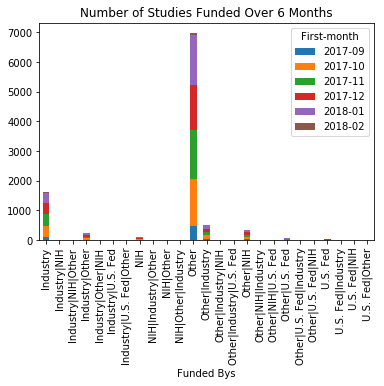

In [104]:
%pylab inline
import matplotlib.pyplot as plt

df2 = df.groupby(['First-month', 'Funded Bys'])['Funded Bys'].count().unstack('First-month').fillna(0)
df2.plot(kind='bar', stacked=True)
plt.title('Number of Studies Funded Over 6 Months')
# df2.index

Text(0.5,1,'Number of Studies Started in Last 6 Months by Research Center')

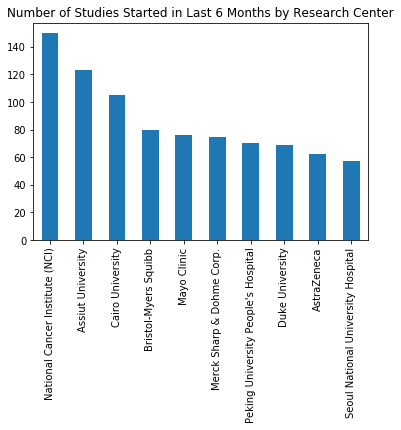

In [108]:
info_sum = info.sum(axis=0)
info_sum.nlargest(10).plot(kind='bar')
plt.title('Number of Studies Started in Last 6 Months by Research Center')

# XML Parsing the Entire Database
Rough draft of the code to parse the entire database (6 GB) downloaded as individual XML files. Not that hard, but also tedious and time-consuming. Will come back to this later.

In [ ]:
# code to walk through directories and parse xml files - Just get each brief_title and concatenate into a list
import pandas as pd
import numpy as np
import matplotlib as plt
from xml.etree import ElementTree as ET
import os
import glob
import deepcopy
from tqdm import tqdm

path = './AllPublicXML'
brief_titles = []

context = etree.iterparse(infile, events=('end',), tag='Title')
for event, elem, in context:
    

for file in tqdm(glob.iglob(path+'/**/*xml', recursive=True)):
    document = ET.parse(file)  # Parsing
    document_root = document.getroot()
    
    for study in document_root.getiterator("clinical_study"):
        if study.findall("brief_title") is None:
            continue;

        for elem in study.findall("brief_title"):
            study = elem.text
            brief_titles.append(study)
            print(study)
    del document, document_root